# Car Damage Detection Project

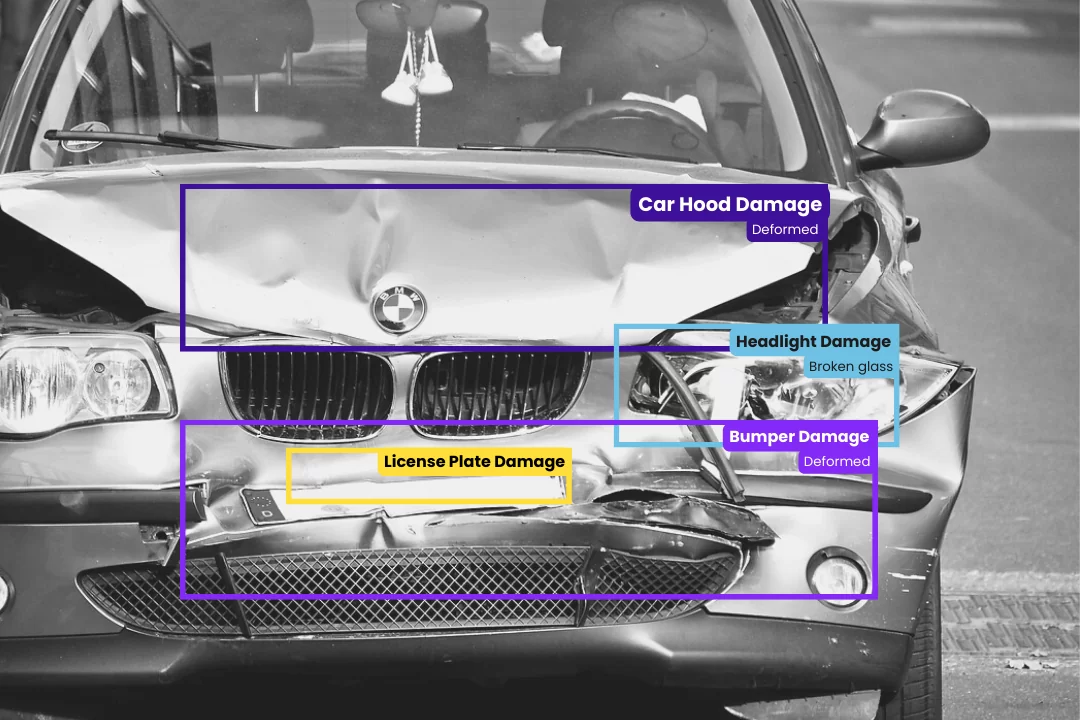

## Introduction

    The growth of commercial car sharing and delivery to the venue results in a growing number of drivers per vehicle. With this trend, the complexity and liability for insurance companies and car owners increases drastically. Therefore, a thorough inspection at each handover is preferred. 

    The common manual inspection method presents problems of low efficiency and time consumption, as well as inadequate and failed detection. To avoid delays in the process, in terms of cost and ease of usage, a more automated and efficient inspection is required. 

## Objective

    One of many ways is to detect anomalities are by comparing an object of interest with an undamaged representation to align the damaged vehicle with a whole, following the testing and training of the results obtained.

    In this project we are aiming to evaluate prediction models, alongside the classification of images using Convolutional Neural Networks.

# STEP 0: Importing Libraries

In [24]:
#for loading & for linear algebra
import pandas as pd
import numpy as np

#for data visualization
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency 
from plotly.offline import init_notebook_mode
from mlens.visualization import corrmat

import plotly.figure_factory as ff
from statistics import stdev
from wordcloud import WordCloud
init_notebook_mode(connected=True)
sns.set_context("notebook")
import random

#for spliting data set
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

#for missing values imputation
import sys
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer, KNNImputer
#from impyute.imputation.cs import fast_knn
#from impyute.imputation.cs import mice
from feature_engine.imputation import RandomSampleImputer, MeanMedianImputer, ArbitraryNumberImputer,EndTailImputer, CategoricalImputer
from feature_engine.discretisation import EqualFrequencyDiscretiser, EqualWidthDiscretiser
from math import sqrt
import random
import numpy as np
random.seed(0)

#for feature engineering
from sklearn.feature_extraction.text import CountVectorizer
from feature_engine.encoding import OneHotEncoder, CountFrequencyEncoder
from feature_engine.discretisation import DecisionTreeDiscretiser

#for feature selection
from feature_engine.selection import DropConstantFeatures, DropDuplicateFeatures, SmartCorrelatedSelection
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV, RFE


#for balancing the dataset
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

#for feature magnitude
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#for Super Learner
from mlens.ensemble import SuperLearner

#for Pipelines and Column Tranformers
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector

#for hyperparametres tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#libraries for Deep Learning
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.preprocessing import image as ig
from tensorflow.keras.preprocessing.image import img_to_array

#for matrixes for evaluating models
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from jupyterthemes import jtplot
jtplot.style()
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

# STEP 1: Importing dataset

In [25]:
train_dir = 'data1a/data1a/training'
test_dir = 'data1a/data1a/validation'

In [26]:
from IPython.core.history import HistorySavingThread
train_data = ImageDataGenerator (
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

# STEP 2: Development of input 64 X 64

## Train / Test split

In [27]:
training_set_64 = train_data.flow_from_directory(train_dir, batch_size = 32, target_size = (64, 64), class_mode = 'categorical')                                             

Found 1840 images belonging to 2 classes.


In [28]:
test_data = ImageDataGenerator(rescale = 1./255)

In [29]:
testing_set_64 = test_data.flow_from_directory(test_dir, batch_size = 32, target_size = (64, 64), class_mode = 'categorical')

Found 460 images belonging to 2 classes.


## Creating Checkpointer

In [31]:
checkpoint = ModelCheckpoint(
    filepath = './base/model64_weights.h5py',
    monitor = 'val_accuracy',
    verbose = 1,
    save_best_only = True,
    mode = 'max',
    save_weights_only  = False,
    save_frequency = 1
)

earlyStop = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.001,
    patience = 50,
    verbose = 1,
    mode = 'auto'
)

opt1 = tf.keras.optimizers.Adam()
callbacks = [checkpoint, earlyStop]

## Building CNN

In [32]:
model_64 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation = 'relu', input_shape = (64, 64, 3)),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(32, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(32, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(32, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(2, activation = 'softmax')
])

In [33]:
model_64.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 31, 31, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 14, 14, 32)       

## Compiling the CNN

In [11]:
model_64.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = opt1,
    metrics = ['accuracy']
)

## Training the CNN

In [12]:
history_64 = model_64.fit(
    training_set_64,
    epochs = 100,
    steps_per_epoch = len(training_set_64),
    validation_data = testing_set_64,
    validation_steps = len(testing_set_64),
    callbacks = callbacks   
)

Epoch 1/100
58/58 [==============================] - ETA: 0s - loss: 0.7060 - accuracy: 0.5060
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ./base\model64_weights.h5py
INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


58/58 [==============================] - 13s 141ms/step - loss: 0.7060 - accuracy: 0.5060 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 2/100
58/58 [==============================] - ETA: 0s - loss: 0.6920 - accuracy: 0.5239
Epoch 2: val_accuracy did not improve from 0.50000
58/58 [==============================] - 5s 87ms/step - loss: 0.6920 - accuracy: 0.5239 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/100
58/58 [==============================] - ETA: 0s - loss: 0.6925 - accuracy: 0.5255
Epoch 3: val_accuracy improved from 0.50000 to 0.58696, saving model to ./base\model64_weights.h5py
INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


58/58 [==============================] - 6s 101ms/step - loss: 0.6925 - accuracy: 0.5255 - val_loss: 0.6912 - val_accuracy: 0.5870
Epoch 4/100
58/58 [==============================] - ETA: 0s - loss: 0.6886 - accuracy: 0.5462
Epoch 4: val_accuracy did not improve from 0.58696
58/58 [==============================] - 5s 81ms/step - loss: 0.6886 - accuracy: 0.5462 - val_loss: 0.6870 - val_accuracy: 0.5391
Epoch 5/100
58/58 [==============================] - ETA: 0s - loss: 0.6762 - accuracy: 0.5935
Epoch 5: val_accuracy improved from 0.58696 to 0.61739, saving model to ./base\model64_weights.h5py
INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


58/58 [==============================] - 6s 101ms/step - loss: 0.6762 - accuracy: 0.5935 - val_loss: 0.6698 - val_accuracy: 0.6174
Epoch 6/100
58/58 [==============================] - ETA: 0s - loss: 0.6385 - accuracy: 0.6489
Epoch 6: val_accuracy improved from 0.61739 to 0.64565, saving model to ./base\model64_weights.h5py
INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


58/58 [==============================] - 6s 101ms/step - loss: 0.6385 - accuracy: 0.6489 - val_loss: 0.6258 - val_accuracy: 0.6457
Epoch 7/100
58/58 [==============================] - ETA: 0s - loss: 0.6196 - accuracy: 0.6571
Epoch 7: val_accuracy improved from 0.64565 to 0.65870, saving model to ./base\model64_weights.h5py
INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


58/58 [==============================] - 6s 106ms/step - loss: 0.6196 - accuracy: 0.6571 - val_loss: 0.6268 - val_accuracy: 0.6587
Epoch 8/100
57/58 [============================>.] - ETA: 0s - loss: 0.6038 - accuracy: 0.6753
Epoch 8: val_accuracy improved from 0.65870 to 0.67826, saving model to ./base\model64_weights.h5py
INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


58/58 [==============================] - 6s 102ms/step - loss: 0.6069 - accuracy: 0.6739 - val_loss: 0.6189 - val_accuracy: 0.6783
Epoch 9/100
58/58 [==============================] - ETA: 0s - loss: 0.5965 - accuracy: 0.6875
Epoch 9: val_accuracy improved from 0.67826 to 0.69130, saving model to ./base\model64_weights.h5py
INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


58/58 [==============================] - 6s 103ms/step - loss: 0.5965 - accuracy: 0.6875 - val_loss: 0.5871 - val_accuracy: 0.6913
Epoch 10/100
58/58 [==============================] - ETA: 0s - loss: 0.5973 - accuracy: 0.6821
Epoch 10: val_accuracy improved from 0.69130 to 0.70217, saving model to ./base\model64_weights.h5py
INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


58/58 [==============================] - 6s 109ms/step - loss: 0.5973 - accuracy: 0.6821 - val_loss: 0.5823 - val_accuracy: 0.7022
Epoch 11/100
58/58 [==============================] - ETA: 0s - loss: 0.5831 - accuracy: 0.6951
Epoch 11: val_accuracy did not improve from 0.70217
58/58 [==============================] - 5s 86ms/step - loss: 0.5831 - accuracy: 0.6951 - val_loss: 0.5950 - val_accuracy: 0.6783
Epoch 12/100
58/58 [==============================] - ETA: 0s - loss: 0.5857 - accuracy: 0.6929
Epoch 12: val_accuracy improved from 0.70217 to 0.71087, saving model to ./base\model64_weights.h5py
INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


58/58 [==============================] - 6s 102ms/step - loss: 0.5857 - accuracy: 0.6929 - val_loss: 0.5803 - val_accuracy: 0.7109
Epoch 13/100
58/58 [==============================] - ETA: 0s - loss: 0.5750 - accuracy: 0.7060
Epoch 13: val_accuracy did not improve from 0.71087
58/58 [==============================] - 5s 85ms/step - loss: 0.5750 - accuracy: 0.7060 - val_loss: 0.6161 - val_accuracy: 0.6457
Epoch 14/100
58/58 [==============================] - ETA: 0s - loss: 0.5638 - accuracy: 0.7043
Epoch 14: val_accuracy did not improve from 0.71087
58/58 [==============================] - 5s 88ms/step - loss: 0.5638 - accuracy: 0.7043 - val_loss: 0.5606 - val_accuracy: 0.7087
Epoch 15/100
58/58 [==============================] - ETA: 0s - loss: 0.5616 - accuracy: 0.7158
Epoch 15: val_accuracy improved from 0.71087 to 0.73478, saving model to ./base\model64_weights.h5py
INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


58/58 [==============================] - 7s 119ms/step - loss: 0.5616 - accuracy: 0.7158 - val_loss: 0.5351 - val_accuracy: 0.7348
Epoch 16/100
58/58 [==============================] - ETA: 0s - loss: 0.5589 - accuracy: 0.7158
Epoch 16: val_accuracy improved from 0.73478 to 0.75435, saving model to ./base\model64_weights.h5py
INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


58/58 [==============================] - 6s 111ms/step - loss: 0.5589 - accuracy: 0.7158 - val_loss: 0.5189 - val_accuracy: 0.7543
Epoch 17/100
58/58 [==============================] - ETA: 0s - loss: 0.5505 - accuracy: 0.7223
Epoch 17: val_accuracy did not improve from 0.75435
58/58 [==============================] - 5s 82ms/step - loss: 0.5505 - accuracy: 0.7223 - val_loss: 0.5319 - val_accuracy: 0.7174
Epoch 18/100
58/58 [==============================] - ETA: 0s - loss: 0.5389 - accuracy: 0.7337
Epoch 18: val_accuracy improved from 0.75435 to 0.77174, saving model to ./base\model64_weights.h5py
INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


58/58 [==============================] - 6s 98ms/step - loss: 0.5389 - accuracy: 0.7337 - val_loss: 0.5249 - val_accuracy: 0.7717
Epoch 19/100
58/58 [==============================] - ETA: 0s - loss: 0.5496 - accuracy: 0.7190
Epoch 19: val_accuracy did not improve from 0.77174
58/58 [==============================] - 5s 81ms/step - loss: 0.5496 - accuracy: 0.7190 - val_loss: 0.5133 - val_accuracy: 0.7283
Epoch 20/100
58/58 [==============================] - ETA: 0s - loss: 0.5168 - accuracy: 0.7451
Epoch 20: val_accuracy did not improve from 0.77174
58/58 [==============================] - 5s 89ms/step - loss: 0.5168 - accuracy: 0.7451 - val_loss: 0.4879 - val_accuracy: 0.7565
Epoch 21/100
58/58 [==============================] - ETA: 0s - loss: 0.5265 - accuracy: 0.7440
Epoch 21: val_accuracy did not improve from 0.77174
58/58 [==============================] - 5s 88ms/step - loss: 0.5265 - accuracy: 0.7440 - val_loss: 0.5003 - val_accuracy: 0.7652
Epoch 22/100
58/58 [================

INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


58/58 [==============================] - 6s 103ms/step - loss: 0.4990 - accuracy: 0.7614 - val_loss: 0.4698 - val_accuracy: 0.7891
Epoch 24/100
58/58 [==============================] - ETA: 0s - loss: 0.5058 - accuracy: 0.7516
Epoch 24: val_accuracy did not improve from 0.78913
58/58 [==============================] - 5s 85ms/step - loss: 0.5058 - accuracy: 0.7516 - val_loss: 0.4732 - val_accuracy: 0.7739
Epoch 25/100
58/58 [==============================] - ETA: 0s - loss: 0.4937 - accuracy: 0.7701
Epoch 25: val_accuracy improved from 0.78913 to 0.80000, saving model to ./base\model64_weights.h5py
INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


58/58 [==============================] - 6s 111ms/step - loss: 0.4937 - accuracy: 0.7701 - val_loss: 0.4544 - val_accuracy: 0.8000
Epoch 26/100
58/58 [==============================] - ETA: 0s - loss: 0.4975 - accuracy: 0.7679
Epoch 26: val_accuracy did not improve from 0.80000
58/58 [==============================] - 5s 84ms/step - loss: 0.4975 - accuracy: 0.7679 - val_loss: 0.4439 - val_accuracy: 0.7957
Epoch 27/100
58/58 [==============================] - ETA: 0s - loss: 0.4823 - accuracy: 0.7723
Epoch 27: val_accuracy did not improve from 0.80000
58/58 [==============================] - 5s 84ms/step - loss: 0.4823 - accuracy: 0.7723 - val_loss: 0.4650 - val_accuracy: 0.7696
Epoch 28/100
58/58 [==============================] - ETA: 0s - loss: 0.4870 - accuracy: 0.7647
Epoch 28: val_accuracy did not improve from 0.80000
58/58 [==============================] - 5s 85ms/step - loss: 0.4870 - accuracy: 0.7647 - val_loss: 0.4297 - val_accuracy: 0.7913
Epoch 29/100
58/58 [===============

INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


58/58 [==============================] - 6s 103ms/step - loss: 0.4466 - accuracy: 0.8005 - val_loss: 0.4122 - val_accuracy: 0.8239
Epoch 31/100
58/58 [==============================] - ETA: 0s - loss: 0.4545 - accuracy: 0.7946
Epoch 31: val_accuracy improved from 0.82391 to 0.82609, saving model to ./base\model64_weights.h5py
INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


58/58 [==============================] - 6s 105ms/step - loss: 0.4545 - accuracy: 0.7946 - val_loss: 0.4034 - val_accuracy: 0.8261
Epoch 32/100
58/58 [==============================] - ETA: 0s - loss: 0.4839 - accuracy: 0.7750
Epoch 32: val_accuracy did not improve from 0.82609
58/58 [==============================] - 5s 84ms/step - loss: 0.4839 - accuracy: 0.7750 - val_loss: 0.4144 - val_accuracy: 0.8000
Epoch 33/100
58/58 [==============================] - ETA: 0s - loss: 0.4581 - accuracy: 0.7924
Epoch 33: val_accuracy did not improve from 0.82609
58/58 [==============================] - 5s 83ms/step - loss: 0.4581 - accuracy: 0.7924 - val_loss: 0.4171 - val_accuracy: 0.8174
Epoch 34/100
58/58 [==============================] - ETA: 0s - loss: 0.4379 - accuracy: 0.7962
Epoch 34: val_accuracy did not improve from 0.82609
58/58 [==============================] - 5s 84ms/step - loss: 0.4379 - accuracy: 0.7962 - val_loss: 0.4113 - val_accuracy: 0.8152
Epoch 35/100
58/58 [===============

INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


58/58 [==============================] - 6s 100ms/step - loss: 0.4580 - accuracy: 0.7880 - val_loss: 0.3915 - val_accuracy: 0.8283
Epoch 36/100
58/58 [==============================] - ETA: 0s - loss: 0.4479 - accuracy: 0.8000
Epoch 36: val_accuracy did not improve from 0.82826
58/58 [==============================] - 5s 85ms/step - loss: 0.4479 - accuracy: 0.8000 - val_loss: 0.4114 - val_accuracy: 0.8196
Epoch 37/100
58/58 [==============================] - ETA: 0s - loss: 0.4510 - accuracy: 0.7995
Epoch 37: val_accuracy did not improve from 0.82826
58/58 [==============================] - 5s 83ms/step - loss: 0.4510 - accuracy: 0.7995 - val_loss: 0.4203 - val_accuracy: 0.8065
Epoch 38/100
57/58 [============================>.] - ETA: 0s - loss: 0.4434 - accuracy: 0.8131
Epoch 38: val_accuracy did not improve from 0.82826
58/58 [==============================] - 5s 83ms/step - loss: 0.4426 - accuracy: 0.8136 - val_loss: 0.4056 - val_accuracy: 0.8087
Epoch 39/100
58/58 [===============

INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


58/58 [==============================] - 6s 105ms/step - loss: 0.4438 - accuracy: 0.7973 - val_loss: 0.3915 - val_accuracy: 0.8370
Epoch 40/100
58/58 [==============================] - ETA: 0s - loss: 0.4458 - accuracy: 0.7957
Epoch 40: val_accuracy did not improve from 0.83696
58/58 [==============================] - 5s 86ms/step - loss: 0.4458 - accuracy: 0.7957 - val_loss: 0.4032 - val_accuracy: 0.8196
Epoch 41/100
58/58 [==============================] - ETA: 0s - loss: 0.4243 - accuracy: 0.8130
Epoch 41: val_accuracy did not improve from 0.83696
58/58 [==============================] - 5s 85ms/step - loss: 0.4243 - accuracy: 0.8130 - val_loss: 0.4131 - val_accuracy: 0.8196
Epoch 42/100
58/58 [==============================] - ETA: 0s - loss: 0.4335 - accuracy: 0.7995
Epoch 42: val_accuracy improved from 0.83696 to 0.84348, saving model to ./base\model64_weights.h5py
INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


58/58 [==============================] - 6s 103ms/step - loss: 0.4335 - accuracy: 0.7995 - val_loss: 0.3712 - val_accuracy: 0.8435
Epoch 43/100
58/58 [==============================] - ETA: 0s - loss: 0.4258 - accuracy: 0.8071
Epoch 43: val_accuracy did not improve from 0.84348
58/58 [==============================] - 5s 85ms/step - loss: 0.4258 - accuracy: 0.8071 - val_loss: 0.4079 - val_accuracy: 0.8174
Epoch 44/100
58/58 [==============================] - ETA: 0s - loss: 0.4128 - accuracy: 0.8190
Epoch 44: val_accuracy did not improve from 0.84348
58/58 [==============================] - 5s 85ms/step - loss: 0.4128 - accuracy: 0.8190 - val_loss: 0.3939 - val_accuracy: 0.8391
Epoch 45/100
58/58 [==============================] - ETA: 0s - loss: 0.4408 - accuracy: 0.8071
Epoch 45: val_accuracy did not improve from 0.84348
58/58 [==============================] - 5s 85ms/step - loss: 0.4408 - accuracy: 0.8071 - val_loss: 0.3994 - val_accuracy: 0.8370
Epoch 46/100
58/58 [===============

INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


58/58 [==============================] - 6s 104ms/step - loss: 0.4296 - accuracy: 0.8071 - val_loss: 0.3737 - val_accuracy: 0.8500
Epoch 47/100
58/58 [==============================] - ETA: 0s - loss: 0.4104 - accuracy: 0.8212
Epoch 47: val_accuracy improved from 0.85000 to 0.85217, saving model to ./base\model64_weights.h5py
INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


58/58 [==============================] - 6s 108ms/step - loss: 0.4104 - accuracy: 0.8212 - val_loss: 0.3783 - val_accuracy: 0.8522
Epoch 48/100
58/58 [==============================] - ETA: 0s - loss: 0.4113 - accuracy: 0.8223
Epoch 48: val_accuracy did not improve from 0.85217
58/58 [==============================] - 5s 87ms/step - loss: 0.4113 - accuracy: 0.8223 - val_loss: 0.3824 - val_accuracy: 0.8391
Epoch 49/100
58/58 [==============================] - ETA: 0s - loss: 0.4173 - accuracy: 0.8082
Epoch 49: val_accuracy improved from 0.85217 to 0.85435, saving model to ./base\model64_weights.h5py
INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


58/58 [==============================] - 6s 106ms/step - loss: 0.4173 - accuracy: 0.8082 - val_loss: 0.3667 - val_accuracy: 0.8543
Epoch 50/100
58/58 [==============================] - ETA: 0s - loss: 0.4028 - accuracy: 0.8163
Epoch 50: val_accuracy did not improve from 0.85435
58/58 [==============================] - 5s 85ms/step - loss: 0.4028 - accuracy: 0.8163 - val_loss: 0.3777 - val_accuracy: 0.8413
Epoch 51/100
57/58 [============================>.] - ETA: 0s - loss: 0.4033 - accuracy: 0.8185
Epoch 51: val_accuracy did not improve from 0.85435
58/58 [==============================] - 5s 83ms/step - loss: 0.4050 - accuracy: 0.8168 - val_loss: 0.3997 - val_accuracy: 0.8196
Epoch 52/100
58/58 [==============================] - ETA: 0s - loss: 0.4027 - accuracy: 0.8212
Epoch 52: val_accuracy did not improve from 0.85435
58/58 [==============================] - 5s 84ms/step - loss: 0.4027 - accuracy: 0.8212 - val_loss: 0.3688 - val_accuracy: 0.8522
Epoch 53/100
58/58 [===============

INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


58/58 [==============================] - 6s 103ms/step - loss: 0.3953 - accuracy: 0.8283 - val_loss: 0.3697 - val_accuracy: 0.8565
Epoch 58/100
58/58 [==============================] - ETA: 0s - loss: 0.3907 - accuracy: 0.8326
Epoch 58: val_accuracy did not improve from 0.85652
58/58 [==============================] - 5s 86ms/step - loss: 0.3907 - accuracy: 0.8326 - val_loss: 0.3846 - val_accuracy: 0.8457
Epoch 59/100
58/58 [==============================] - ETA: 0s - loss: 0.3963 - accuracy: 0.8353
Epoch 59: val_accuracy did not improve from 0.85652
58/58 [==============================] - 5s 83ms/step - loss: 0.3963 - accuracy: 0.8353 - val_loss: 0.3687 - val_accuracy: 0.8478
Epoch 60/100
58/58 [==============================] - ETA: 0s - loss: 0.3826 - accuracy: 0.8315
Epoch 60: val_accuracy did not improve from 0.85652
58/58 [==============================] - 5s 85ms/step - loss: 0.3826 - accuracy: 0.8315 - val_loss: 0.3594 - val_accuracy: 0.8522
Epoch 61/100
58/58 [===============

INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


58/58 [==============================] - 6s 109ms/step - loss: 0.3983 - accuracy: 0.8250 - val_loss: 0.3592 - val_accuracy: 0.8587
Epoch 63/100
58/58 [==============================] - ETA: 0s - loss: 0.3725 - accuracy: 0.8467
Epoch 63: val_accuracy did not improve from 0.85870
58/58 [==============================] - 5s 85ms/step - loss: 0.3725 - accuracy: 0.8467 - val_loss: 0.3640 - val_accuracy: 0.8543
Epoch 64/100
58/58 [==============================] - ETA: 0s - loss: 0.3798 - accuracy: 0.8386
Epoch 64: val_accuracy did not improve from 0.85870
58/58 [==============================] - 5s 90ms/step - loss: 0.3798 - accuracy: 0.8386 - val_loss: 0.3801 - val_accuracy: 0.8457
Epoch 65/100
58/58 [==============================] - ETA: 0s - loss: 0.3697 - accuracy: 0.8310
Epoch 65: val_accuracy did not improve from 0.85870
58/58 [==============================] - 5s 94ms/step - loss: 0.3697 - accuracy: 0.8310 - val_loss: 0.3680 - val_accuracy: 0.8543
Epoch 66/100
58/58 [===============

INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


58/58 [==============================] - 6s 107ms/step - loss: 0.3793 - accuracy: 0.8332 - val_loss: 0.3579 - val_accuracy: 0.8674
Epoch 69/100
58/58 [==============================] - ETA: 0s - loss: 0.3718 - accuracy: 0.8408
Epoch 69: val_accuracy did not improve from 0.86739
58/58 [==============================] - 5s 83ms/step - loss: 0.3718 - accuracy: 0.8408 - val_loss: 0.3578 - val_accuracy: 0.8674
Epoch 70/100
58/58 [==============================] - ETA: 0s - loss: 0.3796 - accuracy: 0.8370
Epoch 70: val_accuracy did not improve from 0.86739
58/58 [==============================] - 5s 85ms/step - loss: 0.3796 - accuracy: 0.8370 - val_loss: 0.3716 - val_accuracy: 0.8348
Epoch 71/100
58/58 [==============================] - ETA: 0s - loss: 0.3691 - accuracy: 0.8413
Epoch 71: val_accuracy did not improve from 0.86739
58/58 [==============================] - 5s 89ms/step - loss: 0.3691 - accuracy: 0.8413 - val_loss: 0.3789 - val_accuracy: 0.8478
Epoch 72/100
58/58 [===============

INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


58/58 [==============================] - 6s 101ms/step - loss: 0.3741 - accuracy: 0.8397 - val_loss: 0.3619 - val_accuracy: 0.8717
Epoch 76/100
58/58 [==============================] - ETA: 0s - loss: 0.3628 - accuracy: 0.8397
Epoch 76: val_accuracy improved from 0.87174 to 0.87609, saving model to ./base\model64_weights.h5py
INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


INFO:tensorflow:Assets written to: ./base\model64_weights.h5py\assets


58/58 [==============================] - 6s 106ms/step - loss: 0.3628 - accuracy: 0.8397 - val_loss: 0.3670 - val_accuracy: 0.8761
Epoch 77/100
58/58 [==============================] - ETA: 0s - loss: 0.3413 - accuracy: 0.8505
Epoch 77: val_accuracy did not improve from 0.87609
58/58 [==============================] - 5s 93ms/step - loss: 0.3413 - accuracy: 0.8505 - val_loss: 0.3924 - val_accuracy: 0.8630
Epoch 78/100
58/58 [==============================] - ETA: 0s - loss: 0.3718 - accuracy: 0.8364
Epoch 78: val_accuracy did not improve from 0.87609
58/58 [==============================] - 5s 83ms/step - loss: 0.3718 - accuracy: 0.8364 - val_loss: 0.3989 - val_accuracy: 0.8457
Epoch 79/100
58/58 [==============================] - ETA: 0s - loss: 0.3722 - accuracy: 0.8380
Epoch 79: val_accuracy did not improve from 0.87609
58/58 [==============================] - 5s 86ms/step - loss: 0.3722 - accuracy: 0.8380 - val_loss: 0.3836 - val_accuracy: 0.8326
Epoch 80/100
58/58 [===============

## Result analysis

In [13]:
def show_final_history(history_64):
    
    fig, ax = plt.subplots(1, 2, figsize = (15, 5))
    
    ax[0].set_title('loss')
    ax[0].plot(history_64.epoch, history_64.history['loss'], label = 'Train loss')
    ax[0].plot(history_64.epoch, history_64.history['val_loss'],label = 'Validation loss')
    
    ax[1].set_title('acc')
    ax[1].plot(history_64.epoch, history_64.history['accuracy'], label = 'Train acc')
    ax[1].plot(history_64.epoch, history_64.history['val_accuracy'], label = 'validation acc')
    ax[0].legend()
    ax[1].legend()

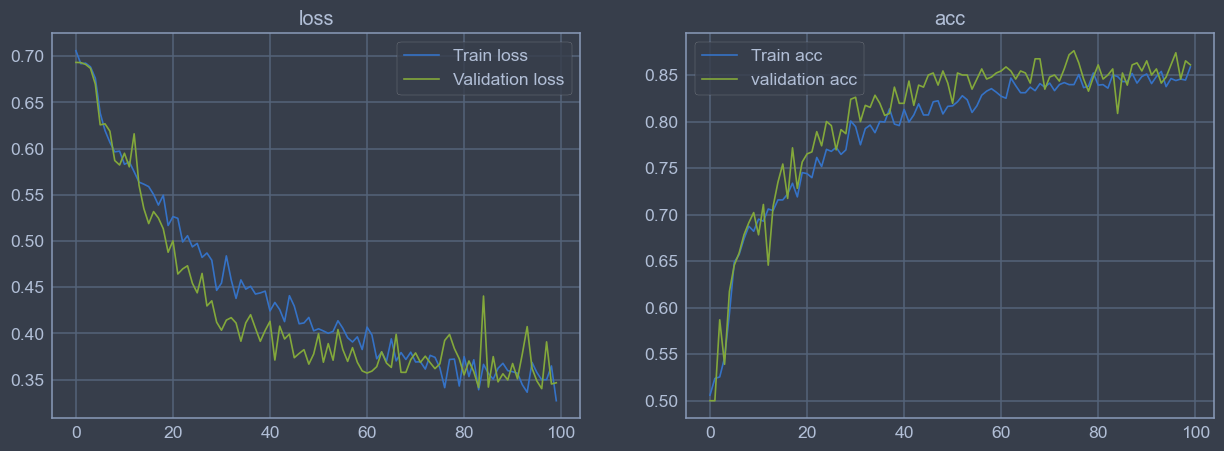

In [14]:
show_final_history(history_64)

1/1 [==============================] - 0s 13ms/step


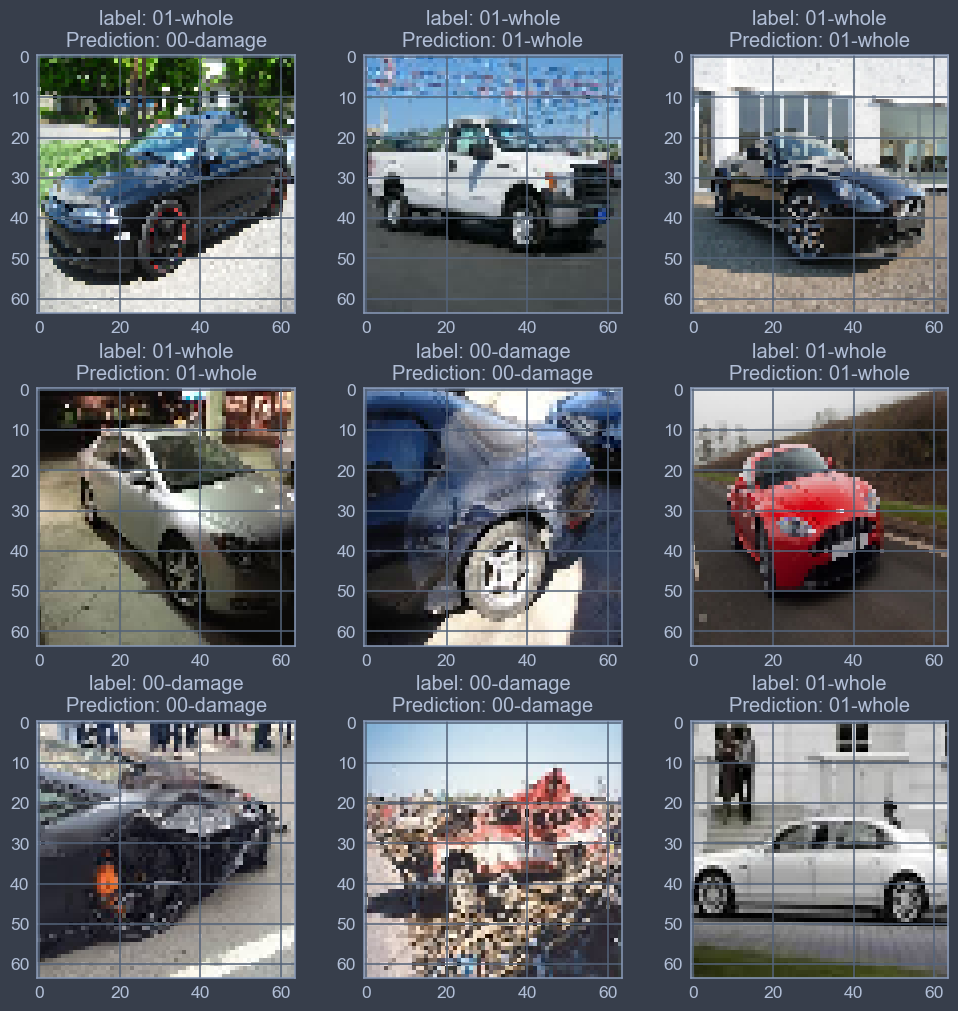

In [15]:
labels = ['00-damage', '01-whole']

it = iter(testing_set_64)
batch = next(it)

fig, axes = plt.subplots(3, 3, figsize = (10, 10))
fig.tight_layout()
fig.subplots_adjust(hspace = 0.25)

for i in range(3):
    for j in range(3):
        ax = axes[i, j]
        image = batch[0][i * 3 + j]
        net_input = image.reshape((1, 64, 64, 3))
        truth = np.argmax(batch[1][i * 3 + j])
        prediction = np.argmax(model_64.predict(net_input))
        ax.set_title('label: %s\nPrediction: %s' % (labels[truth].capitalize(), labels[prediction].capitalize()))
        ax.imshow(image)

In [16]:
def custom_predictions(path):
    img = ig.load_img(path, target_size = (64, 64))
    plt.imshow(img)
    img = np.expand_dims(img, axis = 0)
    img.reshape(1, 64, 64, 3)
    prediction = np.argmax(model_64.predict(img))
    plt.title(labels[prediction])
    plt.show()

## Saving the model

In [17]:
model_json = model_64.to_json()
with open('model_64.json', 'w') as json_file:
    json_file.write(model_json)

# STEP 3: Development of input 128 X 128

## Train / Test split

In [95]:
training_set_128 = train_data.flow_from_directory(train_dir, batch_size = 32, target_size = (128, 128), class_mode = 'categorical')                                             

Found 1840 images belonging to 2 classes.


In [96]:
testing_set_128 = test_data.flow_from_directory(test_dir, batch_size = 32, target_size = (128, 128), class_mode = 'categorical')

Found 460 images belonging to 2 classes.


## Creating Checkpointers

In [97]:
checkpoint_2 = ModelCheckpoint(
    filepath = './base/model28_weights.h5py',
    monitor = 'val_accuracy',
    verbose = 1,
    save_best_only = True,
    mode = 'max',
    save_weights_only  = False,
    save_frequency = 1
)

earlyStop_2 = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.001,
    patience = 50,
    verbose = 1,
    mode = 'auto'
)

from keras.optimizers import SGD
opt1 = SGD(lr=0.01)
callbacks_2 = [checkpoint_2, earlyStop_2]

C:\Users\Kim Stanislav\AppData\Roaming\Python\Python38\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



## Building the CNN

In [98]:
model_128 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 5, activation = 'relu', input_shape = (128, 128, 3)),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(32, 5, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(32, 5, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(32, 6, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(2, activation = 'softmax')
])

In [99]:
model_128.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 124, 124, 32)      2432      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 dropout_65 (Dropout)        (None, 62, 62, 32)        0         
                                                                 
 conv2d_41 (Conv2D)          (None, 58, 58, 32)        25632     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 29, 29, 32)       0         
 g2D)                                                            
                                                                 
 dropout_66 (Dropout)        (None, 29, 29, 32)      

## Compiling the CNN

In [100]:
model_128.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = opt1,
    metrics = ['accuracy']
)

## Training the CNN

In [101]:
history_128 = model_128.fit(
    training_set_128,
    epochs = 100,
    steps_per_epoch = len(training_set_128),
    validation_data = testing_set_128,
    validation_steps = len(testing_set_128),
    callbacks = callbacks_2   
)

Epoch 1/100
58/58 [==============================] - ETA: 0s - loss: 0.7032 - accuracy: 0.5049
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ./base\model28_weights.h5py
INFO:tensorflow:Assets written to: ./base\model28_weights.h5py\assets


INFO:tensorflow:Assets written to: ./base\model28_weights.h5py\assets


58/58 [==============================] - 9s 148ms/step - loss: 0.7032 - accuracy: 0.5049 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/100
58/58 [==============================] - ETA: 0s - loss: 0.6963 - accuracy: 0.4826
Epoch 2: val_accuracy did not improve from 0.50000
58/58 [==============================] - 7s 118ms/step - loss: 0.6963 - accuracy: 0.4826 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/100
58/58 [==============================] - ETA: 0s - loss: 0.6959 - accuracy: 0.4864
Epoch 3: val_accuracy did not improve from 0.50000
58/58 [==============================] - 7s 120ms/step - loss: 0.6959 - accuracy: 0.4864 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/100
58/58 [==============================] - ETA: 0s - loss: 0.6954 - accuracy: 0.4957
Epoch 4: val_accuracy did not improve from 0.50000
58/58 [==============================] - 7s 121ms/step - loss: 0.6954 - accuracy: 0.4957 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 5/100
58/58 [===================

INFO:tensorflow:Assets written to: ./base\model28_weights.h5py\assets


58/58 [==============================] - 8s 140ms/step - loss: 0.6936 - accuracy: 0.4902 - val_loss: 0.6931 - val_accuracy: 0.5239
Epoch 11/100
58/58 [==============================] - ETA: 0s - loss: 0.6929 - accuracy: 0.5016
Epoch 11: val_accuracy did not improve from 0.52391
58/58 [==============================] - 7s 119ms/step - loss: 0.6929 - accuracy: 0.5016 - val_loss: 0.6932 - val_accuracy: 0.5022
Epoch 12/100
58/58 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.4832
Epoch 12: val_accuracy improved from 0.52391 to 0.53261, saving model to ./base\model28_weights.h5py
INFO:tensorflow:Assets written to: ./base\model28_weights.h5py\assets


INFO:tensorflow:Assets written to: ./base\model28_weights.h5py\assets


58/58 [==============================] - 8s 139ms/step - loss: 0.6933 - accuracy: 0.4832 - val_loss: 0.6931 - val_accuracy: 0.5326
Epoch 13/100
58/58 [==============================] - ETA: 0s - loss: 0.6936 - accuracy: 0.4989
Epoch 13: val_accuracy did not improve from 0.53261
58/58 [==============================] - 7s 119ms/step - loss: 0.6936 - accuracy: 0.4989 - val_loss: 0.6931 - val_accuracy: 0.4978
Epoch 14/100
58/58 [==============================] - ETA: 0s - loss: 0.6936 - accuracy: 0.4848
Epoch 14: val_accuracy did not improve from 0.53261
58/58 [==============================] - 7s 118ms/step - loss: 0.6936 - accuracy: 0.4848 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 15/100
58/58 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.5022
Epoch 15: val_accuracy did not improve from 0.53261
58/58 [==============================] - 7s 120ms/step - loss: 0.6931 - accuracy: 0.5022 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 16/100
58/58 [============

INFO:tensorflow:Assets written to: ./base\model28_weights.h5py\assets


58/58 [==============================] - 8s 139ms/step - loss: 0.6901 - accuracy: 0.5707 - val_loss: 0.6920 - val_accuracy: 0.5348
Epoch 30/100
58/58 [==============================] - ETA: 0s - loss: 0.6893 - accuracy: 0.5717
Epoch 30: val_accuracy did not improve from 0.53478
58/58 [==============================] - 7s 117ms/step - loss: 0.6893 - accuracy: 0.5717 - val_loss: 0.6924 - val_accuracy: 0.5065
Epoch 31/100
58/58 [==============================] - ETA: 0s - loss: 0.6888 - accuracy: 0.5685
Epoch 31: val_accuracy did not improve from 0.53478
58/58 [==============================] - 7s 121ms/step - loss: 0.6888 - accuracy: 0.5685 - val_loss: 0.6925 - val_accuracy: 0.5043
Epoch 32/100
58/58 [==============================] - ETA: 0s - loss: 0.6872 - accuracy: 0.5859
Epoch 32: val_accuracy improved from 0.53478 to 0.54348, saving model to ./base\model28_weights.h5py
INFO:tensorflow:Assets written to: ./base\model28_weights.h5py\assets


INFO:tensorflow:Assets written to: ./base\model28_weights.h5py\assets


58/58 [==============================] - 8s 139ms/step - loss: 0.6872 - accuracy: 0.5859 - val_loss: 0.6910 - val_accuracy: 0.5435
Epoch 33/100
58/58 [==============================] - ETA: 0s - loss: 0.6873 - accuracy: 0.5848
Epoch 33: val_accuracy did not improve from 0.54348
58/58 [==============================] - 7s 119ms/step - loss: 0.6873 - accuracy: 0.5848 - val_loss: 0.6915 - val_accuracy: 0.5087
Epoch 34/100
58/58 [==============================] - ETA: 0s - loss: 0.6858 - accuracy: 0.5875
Epoch 34: val_accuracy did not improve from 0.54348
58/58 [==============================] - 7s 119ms/step - loss: 0.6858 - accuracy: 0.5875 - val_loss: 0.6906 - val_accuracy: 0.5304
Epoch 35/100
58/58 [==============================] - ETA: 0s - loss: 0.6845 - accuracy: 0.5973
Epoch 35: val_accuracy did not improve from 0.54348
58/58 [==============================] - 7s 120ms/step - loss: 0.6845 - accuracy: 0.5973 - val_loss: 0.6898 - val_accuracy: 0.5435
Epoch 36/100
58/58 [============

INFO:tensorflow:Assets written to: ./base\model28_weights.h5py\assets


58/58 [==============================] - 8s 142ms/step - loss: 0.6826 - accuracy: 0.5859 - val_loss: 0.6880 - val_accuracy: 0.5848
Epoch 37/100
58/58 [==============================] - ETA: 0s - loss: 0.6799 - accuracy: 0.6022
Epoch 37: val_accuracy did not improve from 0.58478
58/58 [==============================] - 7s 121ms/step - loss: 0.6799 - accuracy: 0.6022 - val_loss: 0.6871 - val_accuracy: 0.5717
Epoch 38/100
58/58 [==============================] - ETA: 0s - loss: 0.6794 - accuracy: 0.5995
Epoch 38: val_accuracy did not improve from 0.58478
58/58 [==============================] - 7s 120ms/step - loss: 0.6794 - accuracy: 0.5995 - val_loss: 0.6864 - val_accuracy: 0.5696
Epoch 39/100
58/58 [==============================] - ETA: 0s - loss: 0.6730 - accuracy: 0.5978
Epoch 39: val_accuracy did not improve from 0.58478
58/58 [==============================] - 7s 121ms/step - loss: 0.6730 - accuracy: 0.5978 - val_loss: 0.6849 - val_accuracy: 0.5674
Epoch 40/100
58/58 [============

INFO:tensorflow:Assets written to: ./base\model28_weights.h5py\assets


58/58 [==============================] - 8s 140ms/step - loss: 0.6720 - accuracy: 0.6082 - val_loss: 0.6790 - val_accuracy: 0.5935
Epoch 42/100
58/58 [==============================] - ETA: 0s - loss: 0.6690 - accuracy: 0.6147
Epoch 42: val_accuracy did not improve from 0.59348
58/58 [==============================] - 7s 119ms/step - loss: 0.6690 - accuracy: 0.6147 - val_loss: 0.6798 - val_accuracy: 0.5674
Epoch 43/100
58/58 [==============================] - ETA: 0s - loss: 0.6662 - accuracy: 0.6158
Epoch 43: val_accuracy did not improve from 0.59348
58/58 [==============================] - 7s 120ms/step - loss: 0.6662 - accuracy: 0.6158 - val_loss: 0.6765 - val_accuracy: 0.5717
Epoch 44/100
58/58 [==============================] - ETA: 0s - loss: 0.6658 - accuracy: 0.6196
Epoch 44: val_accuracy did not improve from 0.59348
58/58 [==============================] - 7s 119ms/step - loss: 0.6658 - accuracy: 0.6196 - val_loss: 0.6730 - val_accuracy: 0.5826
Epoch 45/100
58/58 [============

INFO:tensorflow:Assets written to: ./base\model28_weights.h5py\assets


58/58 [==============================] - 8s 143ms/step - loss: 0.6532 - accuracy: 0.6353 - val_loss: 0.6606 - val_accuracy: 0.6457
Epoch 48/100
58/58 [==============================] - ETA: 0s - loss: 0.6526 - accuracy: 0.6332
Epoch 48: val_accuracy did not improve from 0.64565
58/58 [==============================] - 7s 120ms/step - loss: 0.6526 - accuracy: 0.6332 - val_loss: 0.6698 - val_accuracy: 0.5891
Epoch 49/100
58/58 [==============================] - ETA: 0s - loss: 0.6504 - accuracy: 0.6408
Epoch 49: val_accuracy did not improve from 0.64565
58/58 [==============================] - 7s 120ms/step - loss: 0.6504 - accuracy: 0.6408 - val_loss: 0.6615 - val_accuracy: 0.6109
Epoch 50/100
58/58 [==============================] - ETA: 0s - loss: 0.6516 - accuracy: 0.6277
Epoch 50: val_accuracy did not improve from 0.64565
58/58 [==============================] - 7s 120ms/step - loss: 0.6516 - accuracy: 0.6277 - val_loss: 0.6509 - val_accuracy: 0.6457
Epoch 51/100
58/58 [============

INFO:tensorflow:Assets written to: ./base\model28_weights.h5py\assets


58/58 [==============================] - 8s 144ms/step - loss: 0.6311 - accuracy: 0.6571 - val_loss: 0.6269 - val_accuracy: 0.6543
Epoch 57/100
58/58 [==============================] - ETA: 0s - loss: 0.6351 - accuracy: 0.6587
Epoch 57: val_accuracy did not improve from 0.65435
58/58 [==============================] - 7s 118ms/step - loss: 0.6351 - accuracy: 0.6587 - val_loss: 0.6347 - val_accuracy: 0.6391
Epoch 58/100
58/58 [==============================] - ETA: 0s - loss: 0.6216 - accuracy: 0.6717
Epoch 58: val_accuracy improved from 0.65435 to 0.66522, saving model to ./base\model28_weights.h5py
INFO:tensorflow:Assets written to: ./base\model28_weights.h5py\assets


INFO:tensorflow:Assets written to: ./base\model28_weights.h5py\assets


58/58 [==============================] - 8s 139ms/step - loss: 0.6216 - accuracy: 0.6717 - val_loss: 0.6181 - val_accuracy: 0.6652
Epoch 59/100
58/58 [==============================] - ETA: 0s - loss: 0.6232 - accuracy: 0.6636
Epoch 59: val_accuracy did not improve from 0.66522
58/58 [==============================] - 7s 118ms/step - loss: 0.6232 - accuracy: 0.6636 - val_loss: 0.6260 - val_accuracy: 0.6587
Epoch 60/100
58/58 [==============================] - ETA: 0s - loss: 0.6185 - accuracy: 0.6745
Epoch 60: val_accuracy improved from 0.66522 to 0.67174, saving model to ./base\model28_weights.h5py
INFO:tensorflow:Assets written to: ./base\model28_weights.h5py\assets


INFO:tensorflow:Assets written to: ./base\model28_weights.h5py\assets


58/58 [==============================] - 8s 137ms/step - loss: 0.6185 - accuracy: 0.6745 - val_loss: 0.6107 - val_accuracy: 0.6717
Epoch 61/100
58/58 [==============================] - ETA: 0s - loss: 0.6124 - accuracy: 0.6739
Epoch 61: val_accuracy did not improve from 0.67174
58/58 [==============================] - 7s 118ms/step - loss: 0.6124 - accuracy: 0.6739 - val_loss: 0.6205 - val_accuracy: 0.6630
Epoch 62/100
58/58 [==============================] - ETA: 0s - loss: 0.6228 - accuracy: 0.6609
Epoch 62: val_accuracy improved from 0.67174 to 0.67391, saving model to ./base\model28_weights.h5py
INFO:tensorflow:Assets written to: ./base\model28_weights.h5py\assets


INFO:tensorflow:Assets written to: ./base\model28_weights.h5py\assets


58/58 [==============================] - 8s 143ms/step - loss: 0.6228 - accuracy: 0.6609 - val_loss: 0.6035 - val_accuracy: 0.6739
Epoch 63/100
58/58 [==============================] - ETA: 0s - loss: 0.6190 - accuracy: 0.6690
Epoch 63: val_accuracy did not improve from 0.67391
58/58 [==============================] - 7s 119ms/step - loss: 0.6190 - accuracy: 0.6690 - val_loss: 0.5984 - val_accuracy: 0.6739
Epoch 64/100
57/58 [============================>.] - ETA: 0s - loss: 0.6162 - accuracy: 0.6749
Epoch 64: val_accuracy improved from 0.67391 to 0.68696, saving model to ./base\model28_weights.h5py
INFO:tensorflow:Assets written to: ./base\model28_weights.h5py\assets


INFO:tensorflow:Assets written to: ./base\model28_weights.h5py\assets


58/58 [==============================] - 8s 139ms/step - loss: 0.6166 - accuracy: 0.6739 - val_loss: 0.5962 - val_accuracy: 0.6870
Epoch 65/100
58/58 [==============================] - ETA: 0s - loss: 0.6141 - accuracy: 0.6560
Epoch 65: val_accuracy improved from 0.68696 to 0.68913, saving model to ./base\model28_weights.h5py
INFO:tensorflow:Assets written to: ./base\model28_weights.h5py\assets


INFO:tensorflow:Assets written to: ./base\model28_weights.h5py\assets


58/58 [==============================] - 8s 139ms/step - loss: 0.6141 - accuracy: 0.6560 - val_loss: 0.5968 - val_accuracy: 0.6891
Epoch 66/100
58/58 [==============================] - ETA: 0s - loss: 0.6112 - accuracy: 0.6679
Epoch 66: val_accuracy did not improve from 0.68913
58/58 [==============================] - 7s 119ms/step - loss: 0.6112 - accuracy: 0.6679 - val_loss: 0.6230 - val_accuracy: 0.6543
Epoch 67/100
58/58 [==============================] - ETA: 0s - loss: 0.6140 - accuracy: 0.6658
Epoch 67: val_accuracy improved from 0.68913 to 0.70000, saving model to ./base\model28_weights.h5py
INFO:tensorflow:Assets written to: ./base\model28_weights.h5py\assets


INFO:tensorflow:Assets written to: ./base\model28_weights.h5py\assets


58/58 [==============================] - 8s 143ms/step - loss: 0.6140 - accuracy: 0.6658 - val_loss: 0.5974 - val_accuracy: 0.7000
Epoch 68/100
58/58 [==============================] - ETA: 0s - loss: 0.6164 - accuracy: 0.6652
Epoch 68: val_accuracy did not improve from 0.70000
58/58 [==============================] - 7s 118ms/step - loss: 0.6164 - accuracy: 0.6652 - val_loss: 0.6169 - val_accuracy: 0.6674
Epoch 69/100
58/58 [==============================] - ETA: 0s - loss: 0.6064 - accuracy: 0.6783
Epoch 69: val_accuracy did not improve from 0.70000
58/58 [==============================] - 7s 119ms/step - loss: 0.6064 - accuracy: 0.6783 - val_loss: 0.5892 - val_accuracy: 0.6891
Epoch 70/100
58/58 [==============================] - ETA: 0s - loss: 0.6010 - accuracy: 0.6799
Epoch 70: val_accuracy did not improve from 0.70000
58/58 [==============================] - 7s 119ms/step - loss: 0.6010 - accuracy: 0.6799 - val_loss: 0.5794 - val_accuracy: 0.6804
Epoch 71/100
58/58 [============

INFO:tensorflow:Assets written to: ./base\model28_weights.h5py\assets


58/58 [==============================] - 8s 140ms/step - loss: 0.6065 - accuracy: 0.6842 - val_loss: 0.5825 - val_accuracy: 0.7043
Epoch 73/100
58/58 [==============================] - ETA: 0s - loss: 0.6059 - accuracy: 0.6853
Epoch 73: val_accuracy did not improve from 0.70435
58/58 [==============================] - 7s 118ms/step - loss: 0.6059 - accuracy: 0.6853 - val_loss: 0.6032 - val_accuracy: 0.6804
Epoch 74/100
58/58 [==============================] - ETA: 0s - loss: 0.5956 - accuracy: 0.6940
Epoch 74: val_accuracy improved from 0.70435 to 0.71522, saving model to ./base\model28_weights.h5py
INFO:tensorflow:Assets written to: ./base\model28_weights.h5py\assets


INFO:tensorflow:Assets written to: ./base\model28_weights.h5py\assets


58/58 [==============================] - 8s 140ms/step - loss: 0.5956 - accuracy: 0.6940 - val_loss: 0.5815 - val_accuracy: 0.7152
Epoch 75/100
58/58 [==============================] - ETA: 0s - loss: 0.6102 - accuracy: 0.6772
Epoch 75: val_accuracy did not improve from 0.71522
58/58 [==============================] - 7s 119ms/step - loss: 0.6102 - accuracy: 0.6772 - val_loss: 0.5854 - val_accuracy: 0.7109
Epoch 76/100
58/58 [==============================] - ETA: 0s - loss: 0.6011 - accuracy: 0.6734
Epoch 76: val_accuracy did not improve from 0.71522
58/58 [==============================] - 7s 120ms/step - loss: 0.6011 - accuracy: 0.6734 - val_loss: 0.5999 - val_accuracy: 0.6826
Epoch 77/100
58/58 [==============================] - ETA: 0s - loss: 0.5957 - accuracy: 0.6859
Epoch 77: val_accuracy improved from 0.71522 to 0.71739, saving model to ./base\model28_weights.h5py
INFO:tensorflow:Assets written to: ./base\model28_weights.h5py\assets


INFO:tensorflow:Assets written to: ./base\model28_weights.h5py\assets


58/58 [==============================] - 8s 143ms/step - loss: 0.5957 - accuracy: 0.6859 - val_loss: 0.5829 - val_accuracy: 0.7174
Epoch 78/100
58/58 [==============================] - ETA: 0s - loss: 0.5989 - accuracy: 0.6918
Epoch 78: val_accuracy improved from 0.71739 to 0.72174, saving model to ./base\model28_weights.h5py
INFO:tensorflow:Assets written to: ./base\model28_weights.h5py\assets


INFO:tensorflow:Assets written to: ./base\model28_weights.h5py\assets


58/58 [==============================] - 8s 137ms/step - loss: 0.5989 - accuracy: 0.6918 - val_loss: 0.5735 - val_accuracy: 0.7217
Epoch 79/100
58/58 [==============================] - ETA: 0s - loss: 0.5903 - accuracy: 0.6880
Epoch 79: val_accuracy did not improve from 0.72174
58/58 [==============================] - 7s 118ms/step - loss: 0.5903 - accuracy: 0.6880 - val_loss: 0.5875 - val_accuracy: 0.6870
Epoch 80/100
58/58 [==============================] - ETA: 0s - loss: 0.5943 - accuracy: 0.6826
Epoch 80: val_accuracy did not improve from 0.72174
58/58 [==============================] - 7s 119ms/step - loss: 0.5943 - accuracy: 0.6826 - val_loss: 0.5784 - val_accuracy: 0.7087
Epoch 81/100
58/58 [==============================] - ETA: 0s - loss: 0.5965 - accuracy: 0.6880
Epoch 81: val_accuracy did not improve from 0.72174
58/58 [==============================] - 7s 119ms/step - loss: 0.5965 - accuracy: 0.6880 - val_loss: 0.5848 - val_accuracy: 0.6870
Epoch 82/100
58/58 [============

INFO:tensorflow:Assets written to: ./base\model28_weights.h5py\assets


58/58 [==============================] - 8s 139ms/step - loss: 0.5857 - accuracy: 0.6859 - val_loss: 0.5611 - val_accuracy: 0.7283
Epoch 86/100
58/58 [==============================] - ETA: 0s - loss: 0.5902 - accuracy: 0.6918
Epoch 86: val_accuracy did not improve from 0.72826
58/58 [==============================] - 7s 117ms/step - loss: 0.5902 - accuracy: 0.6918 - val_loss: 0.5868 - val_accuracy: 0.6913
Epoch 87/100
58/58 [==============================] - ETA: 0s - loss: 0.5885 - accuracy: 0.6962
Epoch 87: val_accuracy did not improve from 0.72826
58/58 [==============================] - 7s 125ms/step - loss: 0.5885 - accuracy: 0.6962 - val_loss: 0.5906 - val_accuracy: 0.6761
Epoch 88/100
58/58 [==============================] - ETA: 0s - loss: 0.5757 - accuracy: 0.7098
Epoch 88: val_accuracy did not improve from 0.72826
58/58 [==============================] - 7s 120ms/step - loss: 0.5757 - accuracy: 0.7098 - val_loss: 0.5630 - val_accuracy: 0.7239
Epoch 89/100
58/58 [============

INFO:tensorflow:Assets written to: ./base\model28_weights.h5py\assets


58/58 [==============================] - 8s 144ms/step - loss: 0.5685 - accuracy: 0.7114 - val_loss: 0.5550 - val_accuracy: 0.7391
Epoch 91/100
58/58 [==============================] - ETA: 0s - loss: 0.5835 - accuracy: 0.7033
Epoch 91: val_accuracy did not improve from 0.73913
58/58 [==============================] - 7s 117ms/step - loss: 0.5835 - accuracy: 0.7033 - val_loss: 0.5659 - val_accuracy: 0.7130
Epoch 92/100
58/58 [==============================] - ETA: 0s - loss: 0.5812 - accuracy: 0.7065
Epoch 92: val_accuracy did not improve from 0.73913
58/58 [==============================] - 7s 119ms/step - loss: 0.5812 - accuracy: 0.7065 - val_loss: 0.5661 - val_accuracy: 0.7130
Epoch 93/100
58/58 [==============================] - ETA: 0s - loss: 0.5787 - accuracy: 0.7130
Epoch 93: val_accuracy did not improve from 0.73913
58/58 [==============================] - 7s 119ms/step - loss: 0.5787 - accuracy: 0.7130 - val_loss: 0.5825 - val_accuracy: 0.6804
Epoch 94/100
58/58 [============

INFO:tensorflow:Assets written to: ./base\model28_weights.h5py\assets


58/58 [==============================] - 8s 139ms/step - loss: 0.5753 - accuracy: 0.7000 - val_loss: 0.5453 - val_accuracy: 0.7413
Epoch 99/100
57/58 [============================>.] - ETA: 0s - loss: 0.5767 - accuracy: 0.7100
Epoch 99: val_accuracy did not improve from 0.74130
58/58 [==============================] - 7s 118ms/step - loss: 0.5774 - accuracy: 0.7082 - val_loss: 0.5529 - val_accuracy: 0.7348
Epoch 100/100
58/58 [==============================] - ETA: 0s - loss: 0.5740 - accuracy: 0.7033
Epoch 100: val_accuracy did not improve from 0.74130
58/58 [==============================] - 7s 120ms/step - loss: 0.5740 - accuracy: 0.7033 - val_loss: 0.5428 - val_accuracy: 0.7413


## Result Analysis

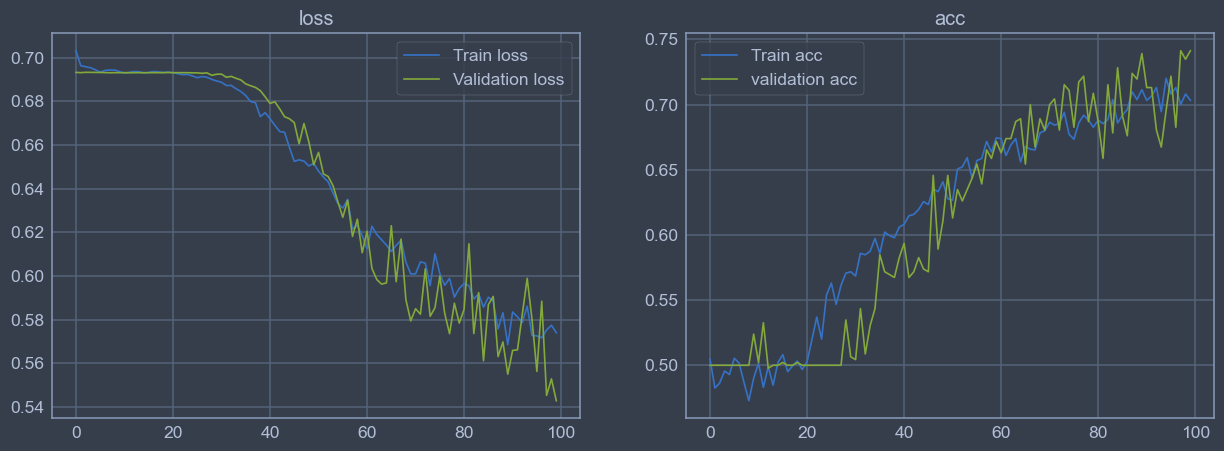

In [102]:
show_final_history(history_128)

1/1 [==============================] - 0s 13ms/step


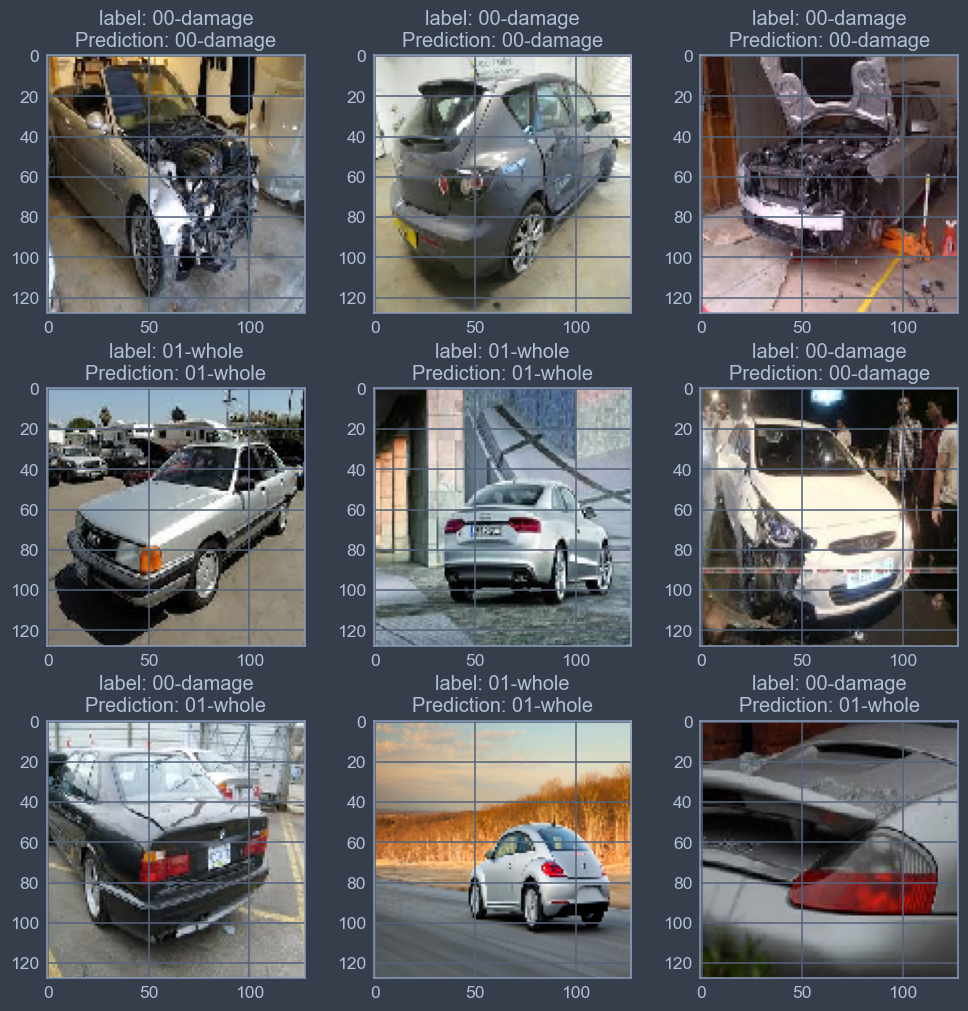

In [78]:
labels = ['00-damage', '01-whole']

it = iter(testing_set_128)
batch = next(it)

fig, axes = plt.subplots(3, 3, figsize = (10, 10))
fig.tight_layout()
fig.subplots_adjust(hspace = 0.25)

for i in range(3):
    for j in range(3):
        ax = axes[i, j]
        image = batch[0][i * 3 + j]
        net_input = image.reshape((1, 128, 128, 3))
        truth = np.argmax(batch[1][i * 3 + j])
        prediction = np.argmax(model_128.predict(net_input))
        ax.set_title('label: %s\nPrediction: %s' % (labels[truth].capitalize(), labels[prediction].capitalize()))
        ax.imshow(image)

## Saving the model

In [43]:
model_json = model_128.to_json()
with open('model_128.json', 'w') as json_file:
    json_file.write(model_json)

# Loading the CNN
with open('model_128.json', 'r')as json_file:
    json_savedModel = json_file.read()
    
model_128 = tf.keras.models.model_from_json(json_savedModel)
model_128.load_weights('./base/model28_weights.h5py')
model_128.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = opt1,
    metrics = ['accuracy']
)

In [46]:
def custom_predictions(path):
    img = ig.load_img(path, target_size = (128, 128))
    plt.imshow(img)
    img = np.expand_dims(img, axis = 0)
    img.reshape(1, 128, 128, 3)
    prediction = np.argmax(model_128.predict(img))
    plt.title(labels[prediction])
    plt.show()

1/1 [==============================] - 0s 284ms/step


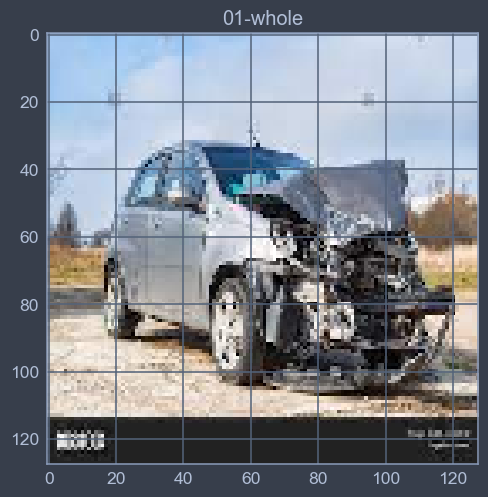

1/1 [==============================] - 0s 16ms/step


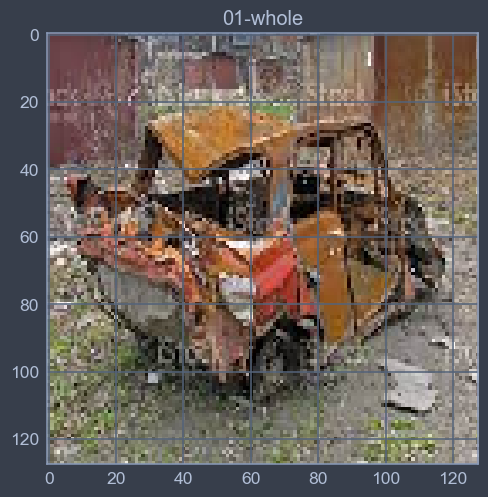

1/1 [==============================] - 0s 16ms/step


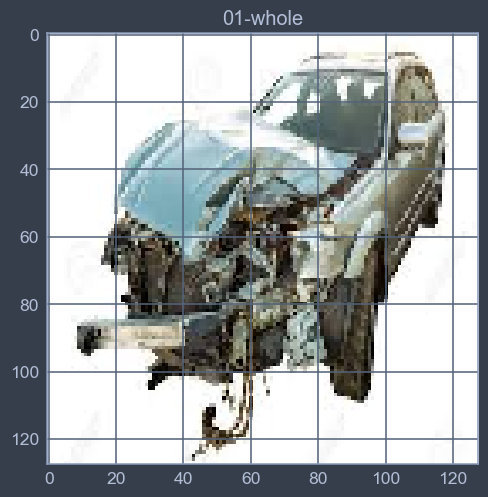

1/1 [==============================] - 0s 14ms/step


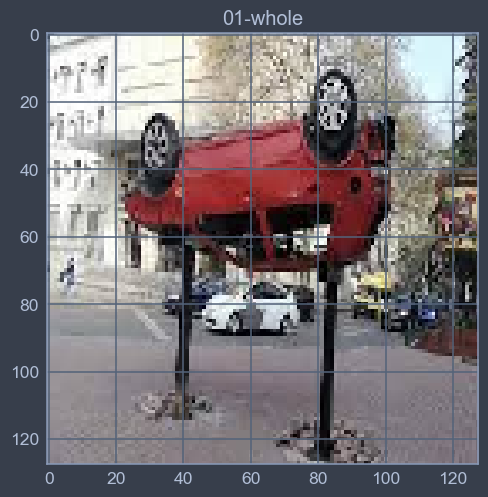

1/1 [==============================] - 0s 15ms/step


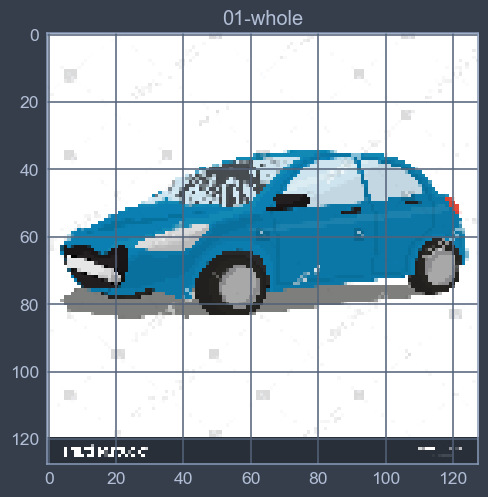

1/1 [==============================] - 0s 15ms/step


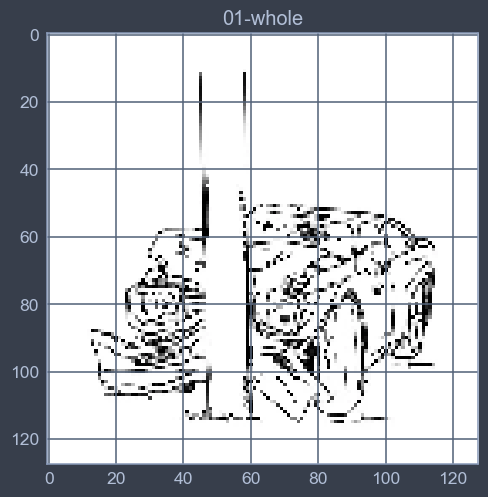

1/1 [==============================] - 0s 15ms/step


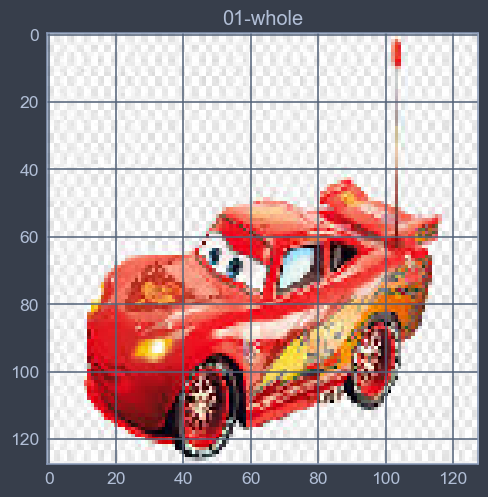

1/1 [==============================] - 0s 15ms/step


D:\Anaconda\envs\KV_DW_JL_5\lib\site-packages\PIL\Image.py:996: UserWarning:

Palette images with Transparency expressed in bytes should be converted to RGBA images



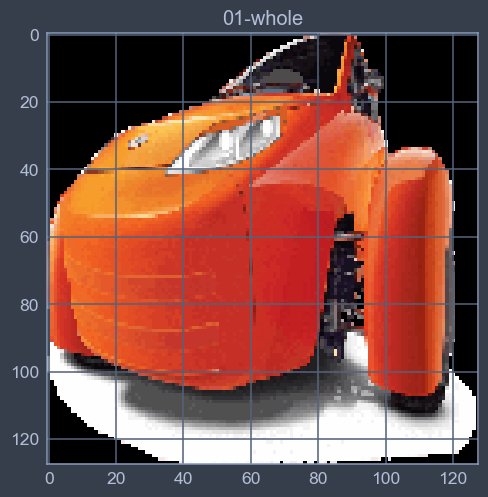

1/1 [==============================] - 0s 14ms/step


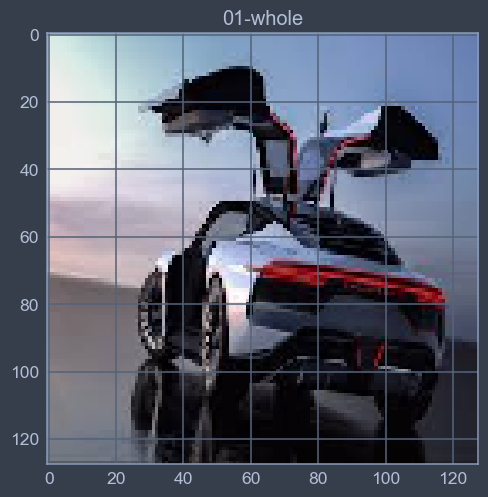

1/1 [==============================] - 0s 15ms/step


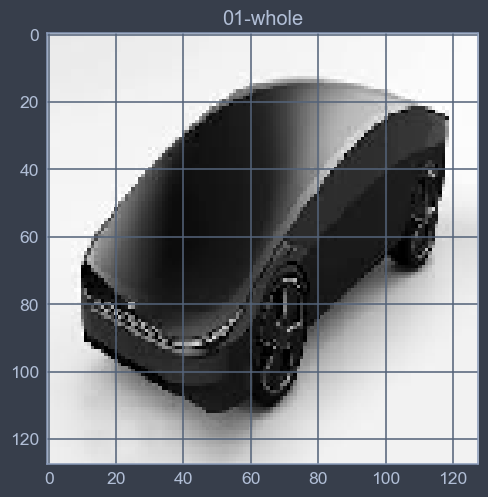

1/1 [==============================] - 0s 13ms/step


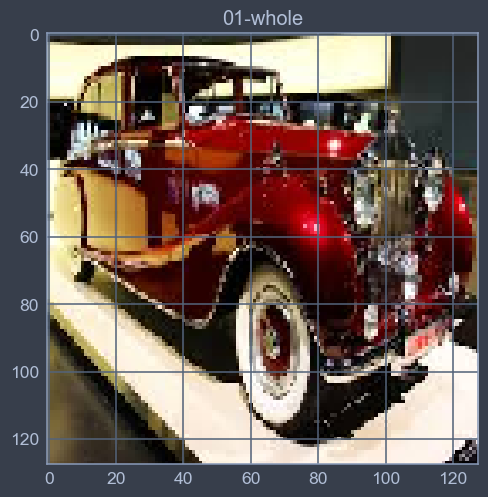

1/1 [==============================] - 0s 16ms/step


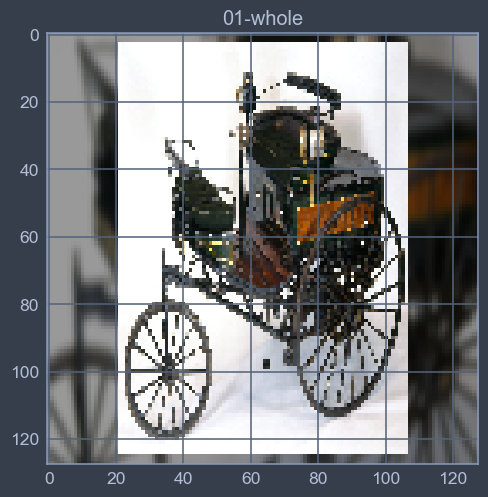

1/1 [==============================] - 0s 12ms/step


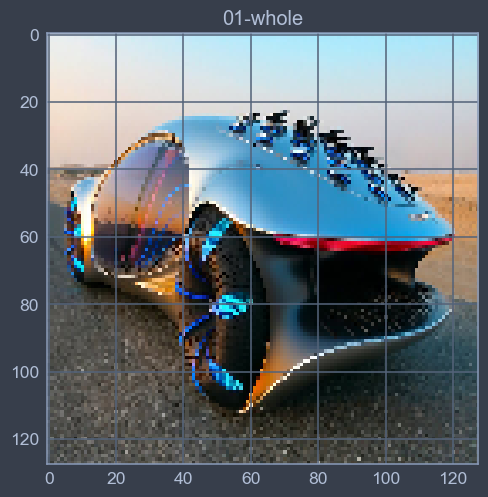

In [47]:
links = [
    r"C:\Users\Kim Stanislav\OneDrive\Рабочий стол\AI courses KV_DW_JL_5\AI_project_5\broken_car_1.jpeg",
    r"C:\Users\Kim Stanislav\OneDrive\Рабочий стол\AI courses KV_DW_JL_5\AI_project_5\broken_car_2.jpeg",
    r"C:\Users\Kim Stanislav\OneDrive\Рабочий стол\AI courses KV_DW_JL_5\AI_project_5\broken_car_3.jpeg",
    r"C:\Users\Kim Stanislav\OneDrive\Рабочий стол\AI courses KV_DW_JL_5\AI_project_5\broken_car_4.jpeg",
    r"C:\Users\Kim Stanislav\OneDrive\Рабочий стол\AI courses KV_DW_JL_5\AI_project_5\broken_car_5.jpg",
    r"C:\Users\Kim Stanislav\OneDrive\Рабочий стол\AI courses KV_DW_JL_5\AI_project_5\broken_car_6.jpg",
    r"C:\Users\Kim Stanislav\OneDrive\Рабочий стол\AI courses KV_DW_JL_5\AI_project_5\toy_car_1.jpeg",
    r"C:\Users\Kim Stanislav\OneDrive\Рабочий стол\AI courses KV_DW_JL_5\AI_project_5\whole_car_1.png",
    r"C:\Users\Kim Stanislav\OneDrive\Рабочий стол\AI courses KV_DW_JL_5\AI_project_5\whole_car_2.jpeg",
    r"C:\Users\Kim Stanislav\OneDrive\Рабочий стол\AI courses KV_DW_JL_5\AI_project_5\whole_car_3.jpeg",
    r"C:\Users\Kim Stanislav\OneDrive\Рабочий стол\AI courses KV_DW_JL_5\AI_project_5\whole_car_4.jpeg",
    r"C:\Users\Kim Stanislav\OneDrive\Рабочий стол\AI courses KV_DW_JL_5\AI_project_5\whole_car_5.jpg",
    r"C:\Users\Kim Stanislav\OneDrive\Рабочий стол\AI courses KV_DW_JL_5\AI_project_5\whole_car_6.jpg",
]

for link in links:
    custom_predictions(link)

# Conclusion

## Training & Evaluating CNN
 
    Target size: 64 x 64:

        > training process is smooth and relatevely stable

        > loss is about 0.35

        > accuracy is more than 85%

    
    Target size: 128 x 128:

        > training process is a bit unstable

        > loss is about 0.55

        > accuracy is about 74%

        
    I suppose that the performance of the model with input size 128 X 128 might be imporved by experimenting the the architecture of the CNN hiden layers.

    Overall, I suppose that it is better to use the input size of 64 X 64 because it shows higher performance and less loss as well as trainig time.

# THANKS!!! :)